# Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [71]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


In [61]:
data = data[['open']]

Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Рекомендуется использовать функцию preprocess_data с вебинара (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [62]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [101]:
def preprocess_date( data, lag_start=5, lag_end=20, test_size=0.15):
    data = pd.DataFrame(data.copy())
    
    # добавляем лани исходного ряда в качестве признаков
    for i in range(5, 20):
        data[f"lag_{i}"] = data['open'].shift(i)
    data = data.dropna()
    data["month"] = data.index.month
    
    #считаем средние только по тренировочноый части 
    data["month_average"] = list(map(code_mean(data[data.index <= split_date], "month", "open").get, data.month))
    
    # удаляем вспом колонку
    data.drop(["month"], axis=1, inplace=True)
        
    X_train = data[data.index <= split_date].drop(['open'], axis=1)
    y_train = data[data.index <= split_date]['open']
    X_test = data[data.index > split_date].drop(['open'], axis=1)
    y_test = data[data.index > split_date]['open']
    
    return X_train, X_test, y_train, y_test

In [102]:
# разбиваем данные
X_train, X_test, y_train, y_test = preprocess_date(data)
X_train.shape

(616, 20)

Text(0.5, 1.0, 'Линейная регрессия\n Mean abs error 29.15117236516579')

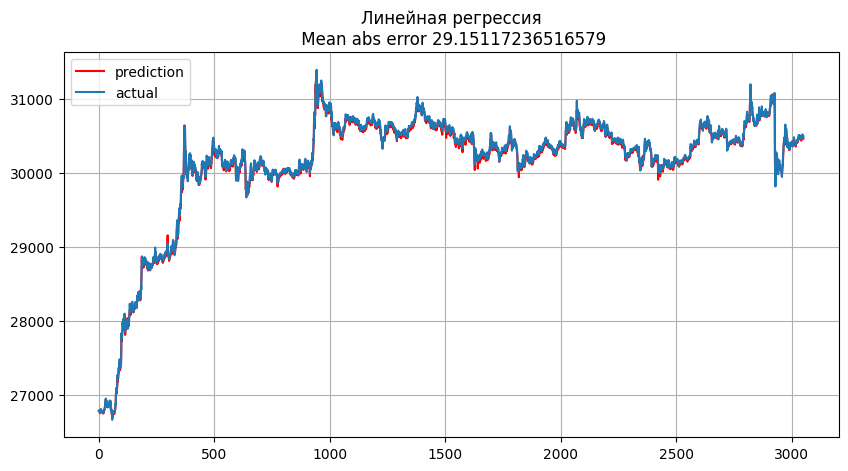

In [105]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(preds, "r", label = "prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Линейная регрессия\n Mean abs error {mean_absolute_error(preds, y_test)}")